# 서울시 CCTV 데이터 분석 프로젝트

## 1. 데이터 불러오기

In [201]:
import pandas as pd
import numpy as np

In [202]:
!pwd

/home/kang/dev_ws/EDA/SYC


In [203]:
seoul_cctv = pd.read_csv('../data/01_Seoul_CCTV.csv')

In [204]:
seoul_cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [205]:
seoul_cctv.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [206]:
seoul_cctv.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [207]:
seoul_cctv.index

RangeIndex(start=0, stop=25, step=1)

In [208]:
seoul_cctv.tail(1)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
24,중랑구,916,509,121,177,109


In [209]:
seoul_cctv.rename(columns={'기관명': '구별'}, inplace=True)

In [210]:
seoul_cctv.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932


In [211]:
pop_seoul

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865
6,동대문구,366011,350647,15364,55718,4.197688,15.223040
7,중랑구,412780,408226,4554,59262,1.103251,14.356800
8,성북구,455407,444055,11352,66251,2.492715,14.547646
9,강북구,328002,324479,3523,56530,1.074079,17.234651
10,도봉구,346234,344166,2068,53488,0.597284,15.448512


In [212]:
pop_seoul = pd.read_excel('../data/01_Seoul_Population.xls', header=2, usecols='B, D, G, J, N') #원본중 필요한 데이터만 추출
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [213]:
#pop_seoul = pd.read_excel('../data/01_Seoul_Population.xls', header=2, usecols='B,D,G')  # 연습해본것
#pop_seoul.head()

- 자치구 -> 구별 
- 계 -> 인구수
- 계.1 -> 한국인
- 계.2 -> 외국인
- 65세이상고령자 -> 고령자

In [214]:
pop_seoul.columns[0]

'자치구'

In [215]:
pop_seoul.rename(columns={
    '자치구': '구별',
    pop_seoul.columns[1]: '인구수',
    pop_seoul.columns[2]: '한국인',
    pop_seoul.columns[3]: '외국인',
    pop_seoul.columns[4]: '고령자',
}, inplace=True)

In [216]:
pop_seoul.head(1)

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126


In [217]:
# 인구수가 많은 구 상위 5개
# 오름차순 또는 내림차순 정렬.
# df의 차순정렬은 sort_value(by='', ascending = )
pop_seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
24,송파구,671173,664496,6677,76582
16,강서구,608255,601691,6564,76032
23,강남구,561052,556164,4888,65060
11,노원구,558075,554403,3672,74243


In [218]:
# 가로 첫번째줄 삭제
pop_seoul.drop(0, axis=0, inplace=True)

In [219]:
pop_seoul.head(1)

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182


In [220]:
seoul_cctv.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932


# 최근증가율

In [221]:
# 최근증가율
seoul_cctv['최근증가율'] = ((seoul_cctv['2014년'] + seoul_cctv['2015년'] + seoul_cctv['2016년']) / seoul_cctv['2013년도 이전']) * 100

In [222]:
# 최근증가율이 가장 낮은 구는 어디인가요?
seoul_cctv.sort_values(by='최근증가율', ascending=False).tail(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
18,양천구,2482,1843,142,30,467,34.671731


In [223]:
pop_seoul['외국인비율'] = (pop_seoul['외국인'] / pop_seoul['인구수']) * 100
pop_seoul['고령자비율'] = (pop_seoul['고령자'] / pop_seoul['인구수']) * 100

In [224]:
# 고령자비율이 가장 적은 곳은 어디인가요?
pop_seoul.sort_values(by='고령자비율', ascending=False).tail() # 내림차순이므로 맨아래 즉 꼬리가 가장 낮은 값일 것이다!

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
22,서초구,445401,441102,4299,53205,0.965198,11.945415
5,광진구,372298,357703,14595,43953,3.920247,11.805865
15,양천구,475018,471154,3864,55234,0.813443,11.627770
23,강남구,561052,556164,4888,65060,0.871220,11.596073
24,송파구,671173,664496,6677,76582,0.994825,11.410173


In [225]:
# 외국인 비율이 가장 높은 곳
pop_seoul.sort_values(by='외국인비율',ascending=False).tail() ## 내림차순이므로 맨아래 즉 꼬리가 가장 낮은 값일 것이다!

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
12,은평구,491202,486794,4408,74559,0.897390,15.178888
23,강남구,561052,556164,4888,65060,0.871220,11.596073
15,양천구,475018,471154,3864,55234,0.813443,11.627770
11,노원구,558075,554403,3672,74243,0.657976,13.303409
10,도봉구,346234,344166,2068,53488,0.597284,15.448512


In [226]:
data_result = pd.merge(seoul_cctv, pop_seoul, on='구별') # merge 는 겹치는 것만 하기 때문에 구별이 겹치게 된다.
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [227]:
data_result.drop(['2013년도 이전', '2014년', '2015년', '2016년'], axis=1, inplace=True) #열방향으로 더한것 그래야 cctv 비율 구할 수 있다.

In [228]:
# CCTV 비율 
# 인구수 대비 CCTV 얼마나 설치 되어 있는가?
data_result['cctv 비율'] = data_result['소계']/data_result['인구수']*100

In [229]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [230]:
data_result.head(1)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.87122,11.596073,0.57713


In [231]:
data_result.sort_values(by='cctv 비율',ascending=False).tail()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율
5,광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
24,중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
17,송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773


In [232]:
data_result.set_index('구별', inplace=True) #inplace=True 변경된 설정 덮어쓰겠다

In [233]:
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.87122,11.596073,0.57713


In [234]:
# !pip install koreanize_matplotlib

In [235]:
import matplotlib.pyplot as plt # Matplotlib는 파이썬에서 데이타를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지
import koreanize_matplotlib #matplotlib를 한국어 표시에 대응시킵니다.

%matplotlib inline #도표와 같은 그림, 소리, 애니메이션 과 같은 결과물들을 Rich output 이라 합니다.
%config InlineBackend.figure_format = "retina" # 레티나 설정 - 폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임

UsageError: unrecognized arguments: #도표와 같은 그림, 소리, 애니메이션 과 같은 결과물들을 Rich output 이라 합니다.


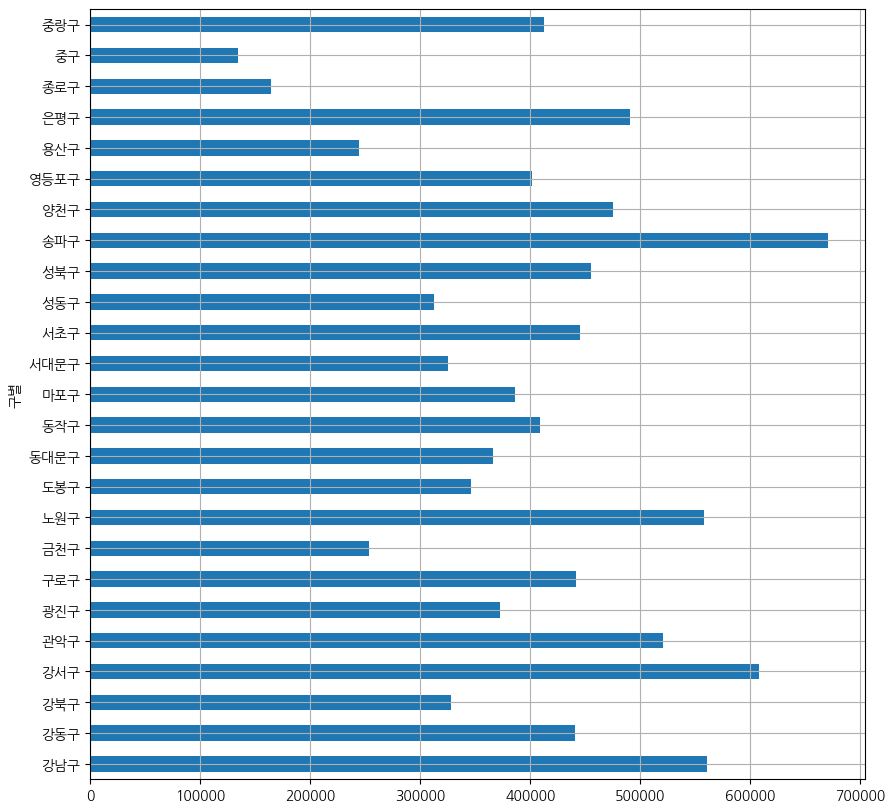

In [236]:
data_result['인구수'].plot(kind='barh', grid=True, figsize=(10, 10)); # gird 격자막대 설정 안설정을 트루 false로 함 barh 가로막대 bar세로막대

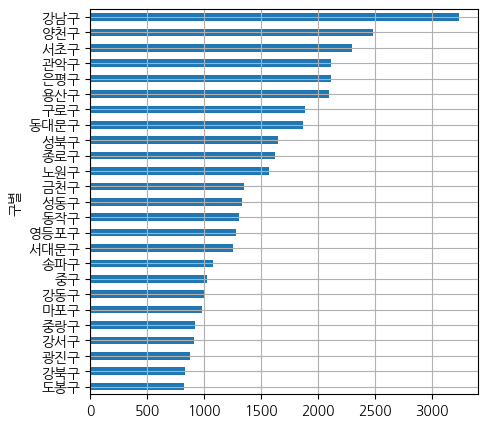

In [237]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(5, 5));

그래프 크기는 14, 10
x 축에는 인구수 
y 축에는 cctv 갯수
scatter (점 그래프)

제목에는 '인구수 대비 CCTV 갯수'
x 축에는 '인구수'
y 축에는 'cctv'

격자 무늬가 있었으면 좋겠습니다

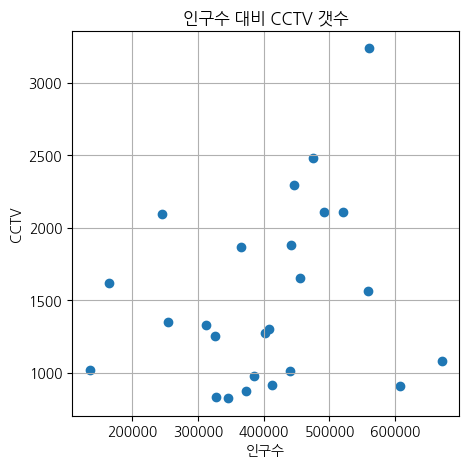

In [238]:
plt.figure(figsize=(5, 5))
plt.scatter(data_result["인구수"], data_result["소계"]) # 소계가 cctv 갯수이기 때문이다.

plt.title("인구수 대비 CCTV 갯수")
plt.xlabel("인구수")
plt.ylabel("CCTV")

plt.grid()
plt.show();

In [243]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5c/e9/ee572691a3fb05555bcde41826faad29ae4bc1fb07982e7f53d54a176879/scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/14/f2/10fa23f0a6b9b2439c01579ae4a9b1849d4822e972515c8f92584bfda5e9/scipy-1.11.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached scipy-1.11.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (59 kB)
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/28/08/9dcdaa5aac4634e4c23af26d92121f7ce445c630efa0d3037881ae2407fb/joblib-1.3.1-py3-none-any.whl.metadata
  Using cached joblib-1.3.1-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency 

In [244]:
from sklearn.linear_model import LinearRegression

In [263]:
# 모델에게 줄 입력데이터와 출력데이터
x = data_result['인구수'].values.reshape(-1, 1) #세로로 쭉나온다
y = data_result['소계'].values

In [246]:
# 회귀분석모델
model = LinearRegression()

In [247]:
# 회귀분석모델 훈련
model.fit(x, y)

LinearRegression()

In [248]:
data_result.describe()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1515.320000,119.030748,404983.160000,394297.040000,10686.120000,54605.040000,3.090717,13.789954,0.414207
std,616.774656,61.350043,129038.641046,130626.795817,8052.299756,14796.822602,2.458736,1.572868,0.211560
min,825.000000,34.671731,134593.000000,125709.000000,2068.000000,21384.000000,0.597284,11.410173,0.149773
25%,1010.000000,64.973730,328002.000000,324479.000000,4408.000000,49266.000000,0.965198,12.753458,0.253352
50%,1327.000000,104.347826,408493.000000,396217.000000,8884.000000,55718.000000,2.527254,13.446362,0.385813
75%,1884.000000,150.619195,475018.000000,471154.000000,14595.000000,65060.000000,4.197688,15.157463,0.515715
max,3238.000000,248.922414,671173.000000,664496.000000,33474.000000,76582.000000,8.326369,17.234651,0.985651


In [264]:
new_x = np.linspace(100000, 700000, 100) #100000부터700000까지 100씩 차이로 채운다
predicted = model.predict(new_x.reshape(-1, 1))

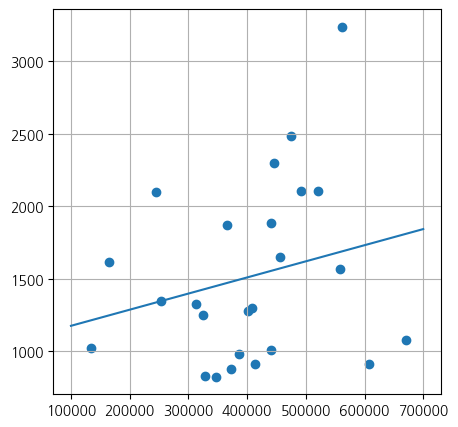

In [250]:
plt.figure(figsize=(5, 5))
plt.scatter(data_result['인구수'], data_result['소계'])
plt.plot(new_x, predicted)
plt.grid()
plt.show();

In [265]:
data_result['오차'] = data_result['소계'] - model.predict(x)
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.87122,11.596073,0.57713,1549.200326


In [252]:
df_sort_f = data_result.sort_values(by='오차', ascending=False)
df_sort_t = data_result.sort_values(by='오차')

In [253]:
df_sort_f.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697


In [254]:
df_sort_t.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861


In [255]:
from matplotlib.colors import ListedColormap

In [256]:
color_step = ['#e74c3c', '#c9571e', '#c9c61e', '#1ec960', '#1e5ac9', '#821ec9']
len(color_step)

6

In [257]:
my_cmap = ListedColormap(color_step)

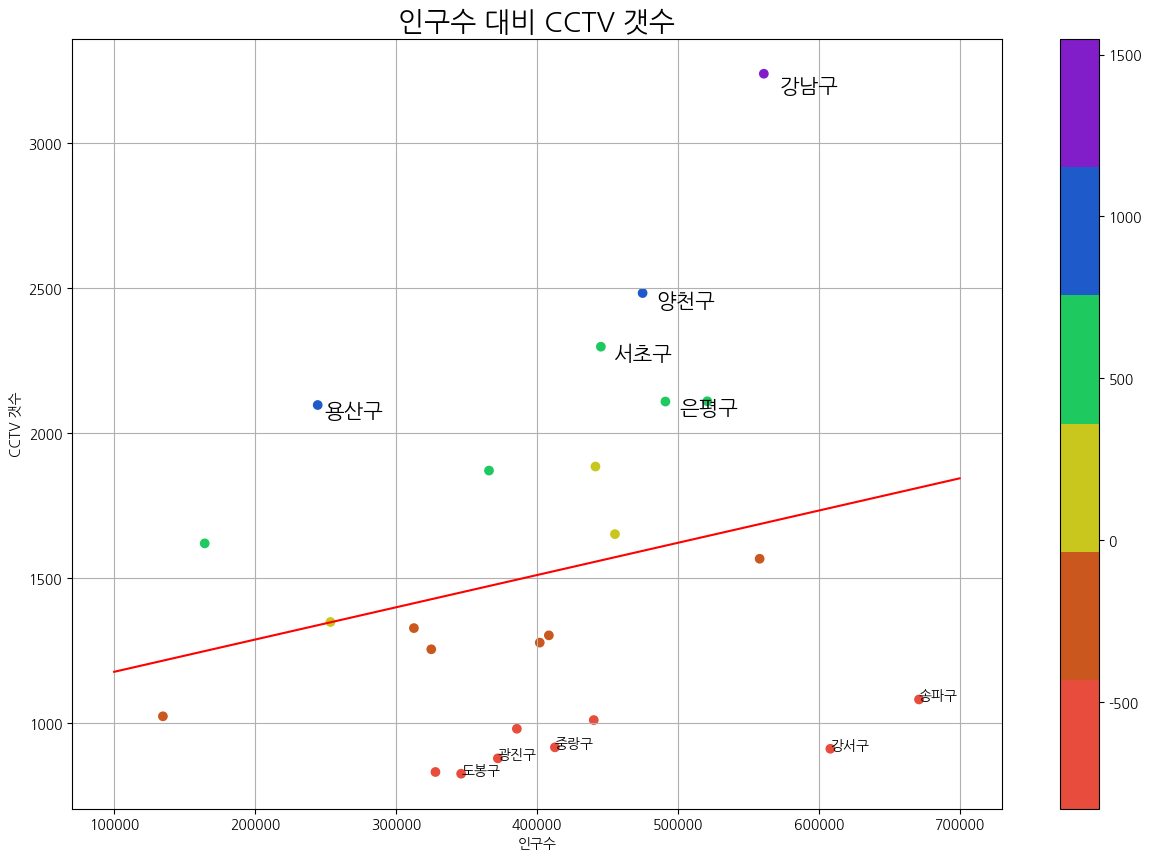

In [258]:
plt.figure(figsize=(15, 10))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], cmap=my_cmap)
plt.plot(new_x, predicted, 'r')

# cctv가 많은 곳 상위 5개 이름 표현
for idx in range(5):
    plt.text(
        df_sort_f['인구수'][idx] * 1.02, 
        df_sort_f['소계'][idx] * 0.98, 
        df_sort_f.index[idx],
        fontsize=15
        )

# cctv가 적은 곳 하위 5개 이름 표현 
for idx in range(5):
    plt.text(
        df_sort_t['인구수'][idx],
        df_sort_t['소계'][idx],
        df_sort_t.index[idx]
    )

# plt.text(data_result['인구수'][0], data_result['소계'][0], data_result.index[0])

plt.title('인구수 대비 CCTV 갯수', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV 갯수')

plt.colorbar()
plt.grid()
plt.show();